### Formative assessment

This notebook is further practice using Python, set in the style of the assessment you will sit.
There are 25 marks available. 

At the end of the practical, make sure you can export your notebook to a pdf.

To do this, 

1. Restart Noteable, selecting "shut down" existing server if needed.
2. Select "Jupyter Classic (Legacy)" rather than a "Geoscience" server.
3. Open your notebook. Go to File -> Download as ->  PDF via LaTex.
4. A pdf version of your notebook should download.
5. If you encounter LaTex errors on saving, check your LaTex and the cell-types (markdown/code/etc) carefully.
6. Note that the functionality to directly export a pdf version from the Geoscience server does not currently work. This is why you need to restart it in the legacy mode. 


The file forestfires.csv contains information relating to a database of forest-fires.

**Reference**: P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.    In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence,    Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,    Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.    Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

Copy the file: forestfires.csv, from the usual location, across to your home filespace.

In [2]:
# load the data
import numpy as np
data = np.loadtxt('forestfires.csv',delimiter = ',',skiprows=1, usecols = (8,9,10,11,12)   )

1. Display to the screen in one output line, showing numbers to 2 decimal places: the maximum, minimium and average value for the burnt area over the forest fires recorded in the database.  [4]

In [3]:
temp = data[:,0]
RH = data[:,1]
wind = data[:,2]
rain = data[:,3]
burnt_area = data[:,4]

print('Min burnt area is {0:.2f} ; max area is {1:.2f} ; average area is {2:.2f}'
      .format(burnt_area.min(), burnt_area.max(), burnt_area.mean() ) )

Min burnt area is 0.00 ; max area is 1090.84 ; average area is 12.85


2. What was the ambient temperature when the fire of maximum area occurred?  [2]

In [4]:
print('Temperature was ', temp[burnt_area.argmax()] )

Temperature was  25.1


3. A client is interested in the number of fires that fall within the burnt area ranges: 0-50, 50-100, 100-150. Add code to your script to find the number of fires that fall within each category.  [6]

In [5]:
print('Number within range 0-50: ', burnt_area[ (burnt_area >= 0) & (burnt_area < 50)].shape[0] )
print('Number within range 50-100: ', burnt_area[ (burnt_area >= 50) & (burnt_area < 100)].shape[0] )
print('Number within range 100-150: ', burnt_area[ (burnt_area >= 100) & (burnt_area < 150)].shape[0] )

Number within range 0-50:  493
Number within range 50-100:  13
Number within range 100-150:  2


4. The client is further interested in the same measure of spread of burnt-area but for fires with a wind speed of at least 3 km/hr. Copy, paste and modify your code for 1b to display the number of fires within each of the three modified categories. [2]

In [6]:
print('Number within range 0-50: ', burnt_area[ (burnt_area >= 0) & (burnt_area < 50) & (wind > 3)].shape[0] )
print('Number within range 50-100: ', burnt_area[ (burnt_area >= 50) & (burnt_area < 100)& (wind > 3)].shape[0] )
print('Number within range 100-150: ', burnt_area[ (burnt_area >= 100) & (burnt_area < 150)& (wind > 3)].shape[0] )

Number within range 0-50:  343
Number within range 50-100:  11
Number within range 100-150:  1


5. The (X,Y) position of the fires can be loaded using the command below. 

Find the maximum value of the burnt area over those fires that satisfy:
- a wind speed of at least 4 km/hr.
- a temperature of no more than 23.0 C.
- an X-position of 5 or less.                   [3]

In [7]:
(X,Y) = np.loadtxt('forestfires.csv',delimiter = ',',skiprows=1, usecols = (0,1), unpack=True   )

print('Max value of burnt area is ',burnt_area[ (wind > 4) & (temp <= 23) & (X <= 5)].max() )

Max value of burnt area is  54.29


6. Another client would like a plot of the whole database of burnt-area against ambient temperature, showing each data point as a filled circle. In order to distinguish the different relative-humidity ranges, plot circles corresponding to RH values of 0-30 as blue, 30-60 as red, 60-100 as green.   [8]

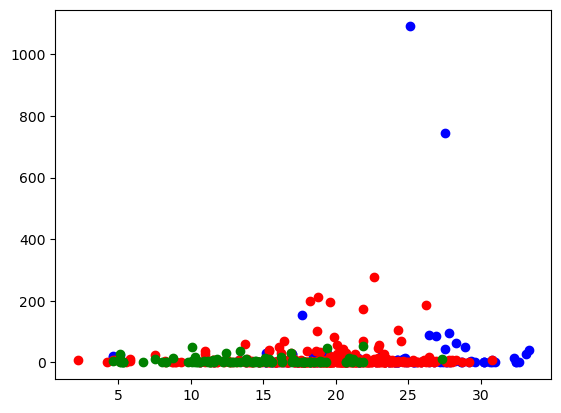

In [8]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot( temp[(RH >= 0) & (RH <= 30)], burnt_area[(RH >= 0) & (RH <= 30)],  'bo')
plt.plot( temp[(RH >= 30) & (RH <= 60)], burnt_area[(RH >= 30) & (RH <= 60)],  'ro')
plt.plot( temp[(RH >= 60) & (RH <= 100)], burnt_area[(RH >= 60) & (RH <= 100)],  'go')